### StarAgile Assignmnet on ML Level 2 - Assignment 4 (Clustering)
#### Assignment Submitted by VINAY.M on 07-09-2023

- Perform EDA and Perform customer segmentation on the following dataset:
- Dataset link:
https://drive.google.com/file/d/1qjaBWI3PIet4p7jRiJ-zpSMjkYNBVKq3/view?usp=share_link

In [ ]:
# VINAY M

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data
df_raw = pd.read_csv("segmentation_data.csv")

In [3]:
df_raw

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [4]:
# Legend
df_legend = pd.read_excel("segmentation_data_legend.xlsx")

In [5]:
df_legend

,Unnamed: 0,Segmentation data - Legend,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,The dataset consists of information about the ...,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,Variable,Data type,Range,Description
3,NaN,ID,numerical,Integer,Shows a unique identificator of a customer.
4,NaN,NaN,NaN,NaN,NaN
5,NaN,Sex,categorical,"{0,1}",Biological sex (gender) of a customer. In this...
6,NaN,NaN,NaN,0,male
7,NaN,NaN,NaN,1,female
8,NaN,NaN,NaN,NaN,NaN
9,NaN,Marital status,categorical,"{0,1}",Marital status of a customer.


In [6]:
df_legend["Segmentation data - Legend"].unique()

array(['The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers. ',
       nan, 'Variable', 'ID', 'Sex', 'Marital status', 'Age', 'Education',
       'Income', 'Occupation', 'Settlement size'], dtype=object)

In [7]:
df_legend["Segmentation data - Legend"].unique()[1:]

array([nan, 'Variable', 'ID', 'Sex', 'Marital status', 'Age', 'Education',
       'Income', 'Occupation', 'Settlement size'], dtype=object)

In [8]:
# Remapping all values except Categorical in the Customer Segmentation Data

In [9]:
sex_dict = {
    0 : 'Male',
    1 : 'Female'
}

marital_dict = {
     0 : 'Single',
     1 : 'Non-Single'
}

education_dict = {
     0 : 'Others-Unknown',
     1 : 'High School',
     2 : 'University',
     3 : 'Graduation School'
}

occupation_dict = {
     0 : 'Unemployed-Unskilled',
     1 : 'Skilled Employee-Official',
     2 : 'Management-Self Employed-Highly Qualified'
}

settlement_dict = {
     0 : 'Small City',
     1 : 'Mid Sized City',
     2 : 'Big City'
}

In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [12]:
df_coded = df_raw.copy(deep=True)

df_coded['Sex'] = df_coded['Sex'].replace(sex_dict)
df_coded['Marital status'] = df_coded['Marital status'].replace(marital_dict)
df_coded['Education'] = df_coded['Education'].replace(education_dict)
df_coded['Occupation'] = df_coded['Occupation'].replace(occupation_dict)
df_coded['Settlement size'] = df_coded['Settlement size'].replace(settlement_dict)

In [13]:
df_coded

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,Male,Single,67,University,124670,Skilled Employee-Official,Big City
1,100000002,Female,Non-Single,22,High School,150773,Skilled Employee-Official,Big City
2,100000003,Male,Single,49,High School,89210,Unemployed-Unskilled,Small City
3,100000004,Male,Single,45,High School,171565,Skilled Employee-Official,Mid Sized City
4,100000005,Male,Single,53,High School,149031,Skilled Employee-Official,Mid Sized City
...,...,...,...,...,...,...,...,...
1995,100001996,Female,Single,47,High School,123525,Unemployed-Unskilled,Small City
1996,100001997,Female,Non-Single,27,High School,117744,Skilled Employee-Official,Small City
1997,100001998,Male,Single,31,Others-Unknown,86400,Unemployed-Unskilled,Small City
1998,100001999,Female,Non-Single,24,High School,97968,Unemployed-Unskilled,Small City


In [14]:
# EDA

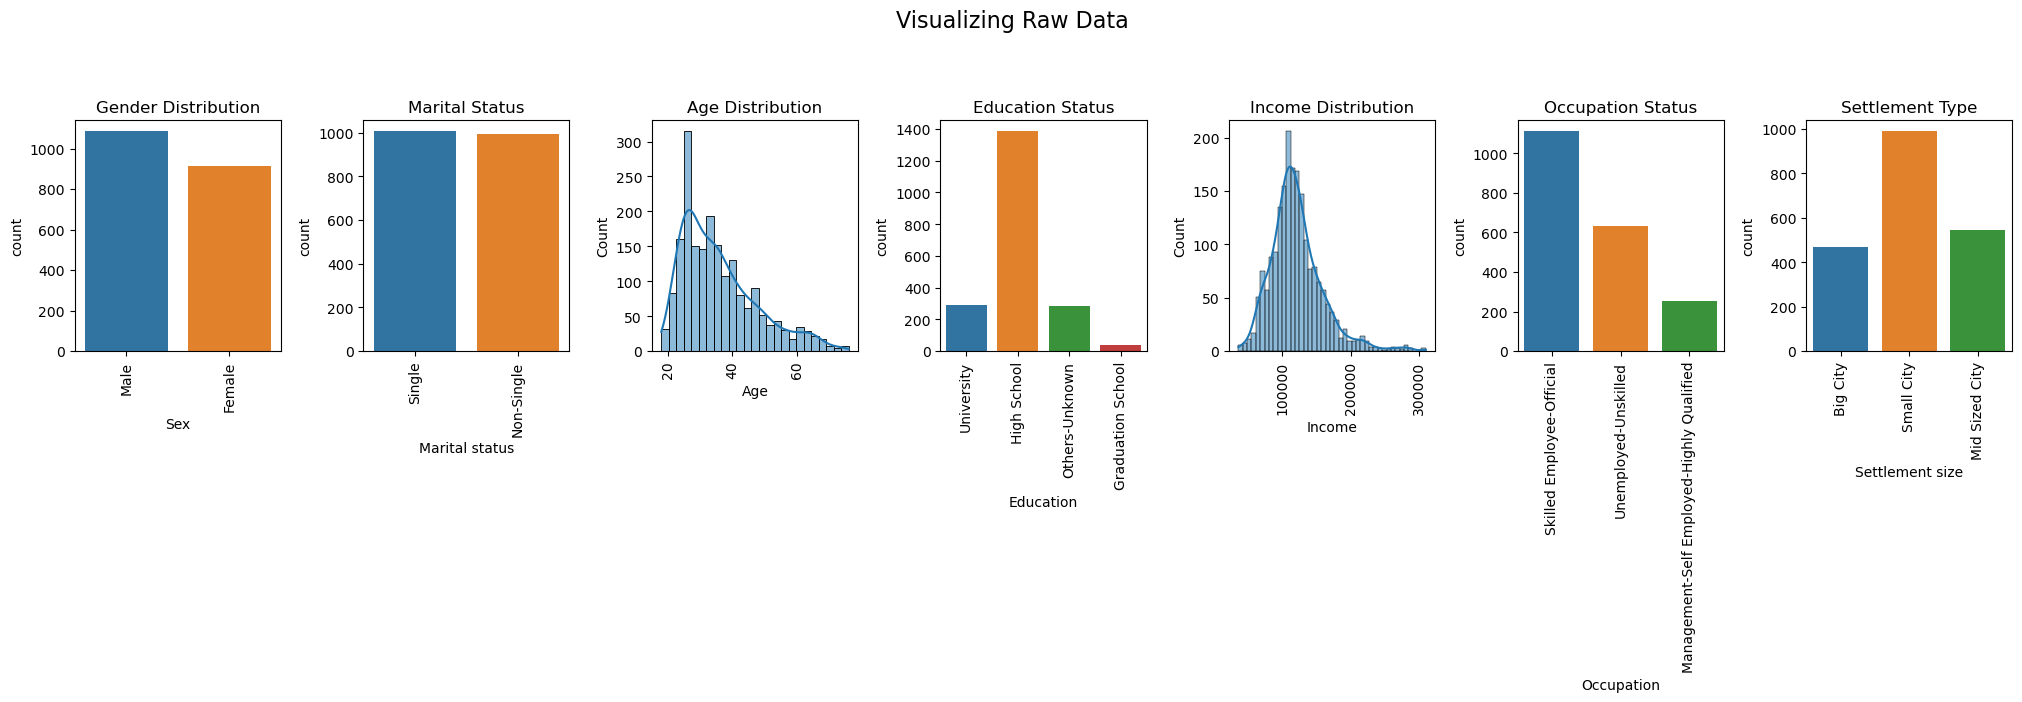

In [15]:
data = df_coded.copy(deep=True)
    
fig, axis = plt.subplots(1, 7, figsize=(25, 3))
    
# Plot 1: Categorical Plot for Sex
sns.countplot(x='Sex', data=data, ax=axis[0])
axis[0].set_title('Gender Distribution')
axis[0].tick_params(axis='x', rotation=90)

# Plot 2: Categorical Plot for marital Status
sns.countplot(x='Marital status', data=data, ax=axis[1])
axis[1].set_title('Marital Status')
axis[1].tick_params(axis='x', rotation=90)

# Plot 3: Distribution Plot Age
sns.histplot(data['Age'], kde=True, ax=axis[2])
axis[2].set_title('Age Distribution')
axis[2].tick_params(axis='x', rotation=90)

# Plot 4: Categorical Plot for Education
sns.countplot(x='Education', data=data, ax=axis[3])
axis[3].set_title('Education Status')
axis[3].tick_params(axis='x', rotation=90)

# Plot 5: Distribution Plot for Income
sns.histplot(data['Income'], kde=True, ax=axis[4])
axis[4].set_title('Income Distribution')
axis[4].tick_params(axis='x', rotation=90)

# Plot 6: Distribution Plot for Occupation
sns.countplot(x='Occupation', data=data, ax=axis[5])
axis[5].set_title('Occupation Status')
axis[5].tick_params(axis='x', rotation=90)

# Plot 7: Categorical Plot for Settlement
sns.countplot(x='Settlement size', data=data, ax=axis[6])
axis[6].set_title('Settlement Type')
axis[6].tick_params(axis='x', rotation=90)
fig.suptitle(f'Visualizing Raw Data', fontsize=16, y=1.25)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
# Show the plot
plt.show()

In [16]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [17]:
# Dropping ID which has no significance in clustering

In [18]:
col = "ID"
df_analysis = df_raw.drop(col, axis=1)

In [19]:
df_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [20]:
df_analysis.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [21]:
# Scaling Age and Income

In [22]:
from sklearn.preprocessing import StandardScaler
to_scale = ['Age', 'Income']
scaler = StandardScaler()
df_analysis[to_scale] = scaler.fit_transform(df_analysis[to_scale])
df_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,2.653614,2,0.097524,1,2
1,1,1,-1.187132,1,0.782654,1,2
2,0,0,1.117316,1,-0.833202,0,0
3,0,0,0.775916,1,1.328386,1,1
4,0,0,1.458716,1,0.736932,1,1
...,...,...,...,...,...,...,...
1995,1,0,0.946616,1,0.067471,0,0
1996,1,1,-0.760382,1,-0.084265,1,0
1997,0,0,-0.418983,0,-0.906957,0,0
1998,1,1,-1.016432,1,-0.603329,0,0


In [23]:
# Finding Optimum Clusters

In [24]:
kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(df_analysis)

KMeans(n_clusters=6, random_state=0)

In [25]:
wcss=[]
for i in range(1,11):
    print(i)
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_analysis)
    wcss.append(kmeans.inertia_)
print(wcss)

1
2
3
4
5
6
7
8
9
10
[7850.327000000001, 5535.854855070242, 4465.087691540155, 3925.8784161511403, 3521.0422905324044, 3188.9373826342703, 2959.1249500743834, 2728.3931373885853, 2575.3600302917544, 2410.398919548253]


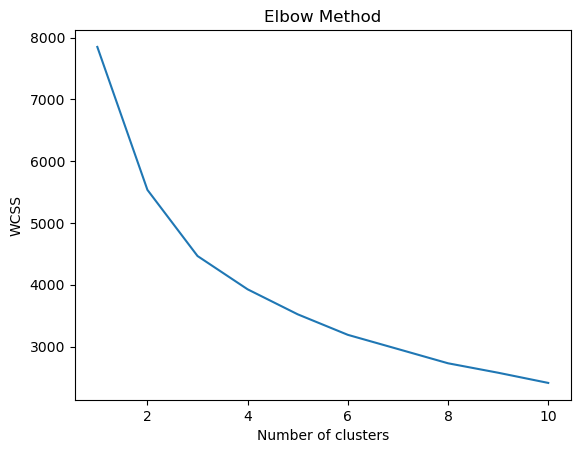

In [26]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(i,random_state=0)
    kmeans.fit(df_analysis)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
# Optimal Cluster is 3 based on Elbow Plot

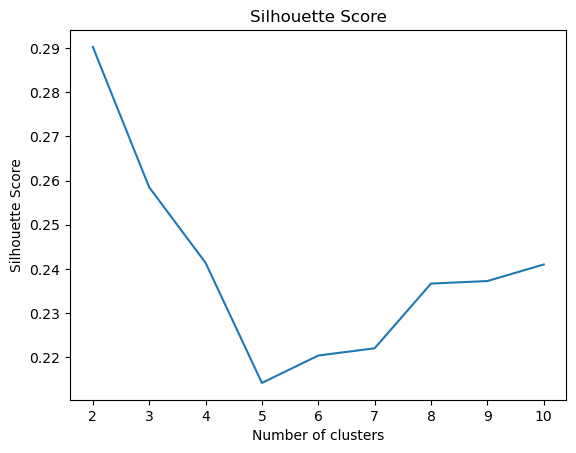

In [50]:
# Finding Optimal Clusters using Silhoutte Score
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(df_analysis)
    silhouette_avg = silhouette_score(df_analysis, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [51]:
# Optimal Cluster is 5 based on Silhouette Score

In [54]:
#Build K-Means Clustering algorithm

clusters_new = KMeans(5, random_state=42)
#pred_y =clusters_new.fit(df_analysis) #old
pred_y =clusters_new.fit_predict(df_analysis) #newline

In [55]:
clusters_new.labels_

array([1, 0, 2, ..., 2, 2, 2])

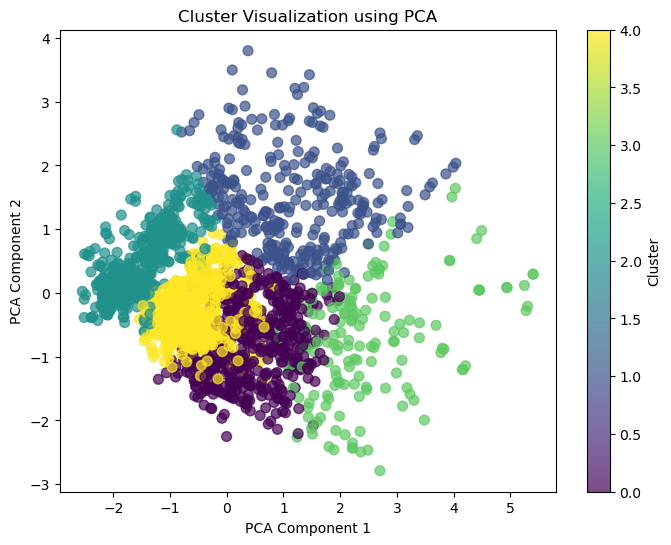

In [56]:
# Visualisation of Cluster Seperability

from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_analysis)

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=pred_y, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization using PCA')
plt.colorbar(label='Cluster')
plt.show()

In [58]:
#Silhoutte Score of 5 clusters
from sklearn.metrics import silhouette_score
silhouette_score(df_analysis,clusters_new.labels_)

0.21567938935489517

In [59]:
# Creating a new copy of dataframe and adding the cluster labels
df_clustered = df_analysis.copy(deep=True)
df_clustered['Cluster'] = clusters_new.labels_
df_clustered

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,0,0,2.653614,2,0.097524,1,2,1
1,1,1,-1.187132,1,0.782654,1,2,0
2,0,0,1.117316,1,-0.833202,0,0,2
3,0,0,0.775916,1,1.328386,1,1,3
4,0,0,1.458716,1,0.736932,1,1,1
...,...,...,...,...,...,...,...,...
1995,1,0,0.946616,1,0.067471,0,0,1
1996,1,1,-0.760382,1,-0.084265,1,0,4
1997,0,0,-0.418983,0,-0.906957,0,0,2
1998,1,1,-1.016432,1,-0.603329,0,0,2


In [60]:
# Creating a new copy of dataframe with mapped values and adding the cluster labels
df_clustered_labelled = df_coded.copy(deep=True)
df_clustered_labelled['Cluster'] = clusters_new.labels_
df_clustered_labelled

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,100000001,Male,Single,67,University,124670,Skilled Employee-Official,Big City,1
1,100000002,Female,Non-Single,22,High School,150773,Skilled Employee-Official,Big City,0
2,100000003,Male,Single,49,High School,89210,Unemployed-Unskilled,Small City,2
3,100000004,Male,Single,45,High School,171565,Skilled Employee-Official,Mid Sized City,3
4,100000005,Male,Single,53,High School,149031,Skilled Employee-Official,Mid Sized City,1
...,...,...,...,...,...,...,...,...,...
1995,100001996,Female,Single,47,High School,123525,Unemployed-Unskilled,Small City,1
1996,100001997,Female,Non-Single,27,High School,117744,Skilled Employee-Official,Small City,4
1997,100001998,Male,Single,31,Others-Unknown,86400,Unemployed-Unskilled,Small City,2
1998,100001999,Female,Non-Single,24,High School,97968,Unemployed-Unskilled,Small City,2


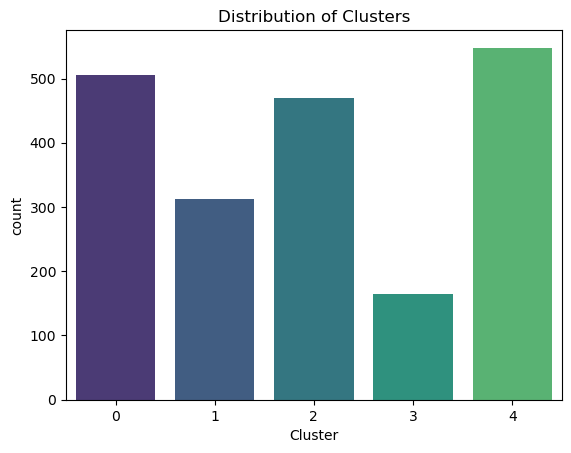

In [61]:
#Segregated Rows and Distribution among Clusters
sns.countplot(x=df_clustered_labelled['Cluster'], palette=sns.color_palette("viridis"))
plt.title('Distribution of Clusters');

In [62]:
# Cluster Statistics
df_clustered_labelled['Cluster'].value_counts()

4    548
0    506
2    469
1    313
3    164
Name: Cluster, dtype: int64

In [64]:
# Cluster Percentage
CountCluster = df_clustered_labelled['Cluster'].value_counts()
percentage_counts = (CountCluster / len(df_raw)) * 100
percentage_counts

4    27.40
0    25.30
2    23.45
1    15.65
3     8.20
Name: Cluster, dtype: float64

In [68]:
# Seperation of Clusters numbers as array

In [69]:
df_clustered_labelled['Cluster'].unique()

array([1, 0, 2, 3, 4])

In [70]:
for value in df_clustered_labelled['Cluster'].unique():
    print(value)

1
0
2
3
4


In [71]:
# Create an empty dictionary to store DataFrames for each cluster
clustered_dataframes = {}
# Loop through unique cluster values
for value in df_clustered_labelled['Cluster'].unique():
    # Create a DataFrame for the current cluster
    cluster_df = df_clustered_labelled[df_clustered_labelled['Cluster'] == value]
    # Add the DataFrame to the dictionary with a key indicating the cluster
    clustered_dataframes[f'cluster_{value}'] = cluster_df

In [72]:
clustered_dataframes.keys()

dict_keys(['cluster_1', 'cluster_0', 'cluster_2', 'cluster_3', 'cluster_4'])

In [73]:
# We can fetch the cluster details
clustered_dataframes['cluster_0']

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
1,100000002,Female,Non-Single,22,High School,150773,Skilled Employee-Official,Big City,0
12,100000013,Female,Non-Single,22,High School,108687,Skilled Employee-Official,Big City,0
17,100000018,Male,Single,25,Others-Unknown,157434,Skilled Employee-Official,Big City,0
19,100000020,Male,Single,31,Others-Unknown,144657,Skilled Employee-Official,Mid Sized City,0
21,100000022,Male,Single,44,High School,147511,Skilled Employee-Official,Mid Sized City,0
...,...,...,...,...,...,...,...,...,...
1415,100001416,Female,Single,30,High School,139468,Skilled Employee-Official,Mid Sized City,0
1451,100001452,Female,Single,35,High School,137736,Skilled Employee-Official,Mid Sized City,0
1528,100001529,Female,Single,39,High School,106037,Skilled Employee-Official,Mid Sized City,0
1545,100001546,Female,Single,28,High School,141453,Management-Self Employed-Highly Qualified,Mid Sized City,0


In [74]:
clustered_dataframes['cluster_1']

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,100000001,Male,Single,67,University,124670,Skilled Employee-Official,Big City,1
4,100000005,Male,Single,53,High School,149031,Skilled Employee-Official,Mid Sized City,1
6,100000007,Male,Single,53,High School,156495,Skilled Employee-Official,Mid Sized City,1
8,100000009,Male,Non-Single,61,University,151591,Unemployed-Unskilled,Small City,1
13,100000014,Male,Single,60,University,89374,Unemployed-Unskilled,Small City,1
...,...,...,...,...,...,...,...,...,...
1874,100001875,Male,Single,53,High School,121970,Unemployed-Unskilled,Small City,1
1991,100001992,Male,Single,54,High School,128537,Skilled Employee-Official,Small City,1
1992,100001993,Female,Single,51,High School,101074,Unemployed-Unskilled,Small City,1
1994,100001995,Male,Single,45,High School,113414,Skilled Employee-Official,Small City,1


In [75]:
# Generating the insights of Different Clusters

In [76]:
sorted_keys = sorted(clustered_dataframes.keys())
sorted_keys

['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']

In [77]:
clustered_dataframes['cluster_0'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 1594
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               506 non-null    int64 
 1   Sex              506 non-null    object
 2   Marital status   506 non-null    object
 3   Age              506 non-null    int64 
 4   Education        506 non-null    object
 5   Income           506 non-null    int64 
 6   Occupation       506 non-null    object
 7   Settlement size  506 non-null    object
 8   Cluster          506 non-null    int32 
dtypes: int32(1), int64(3), object(5)
memory usage: 37.6+ KB


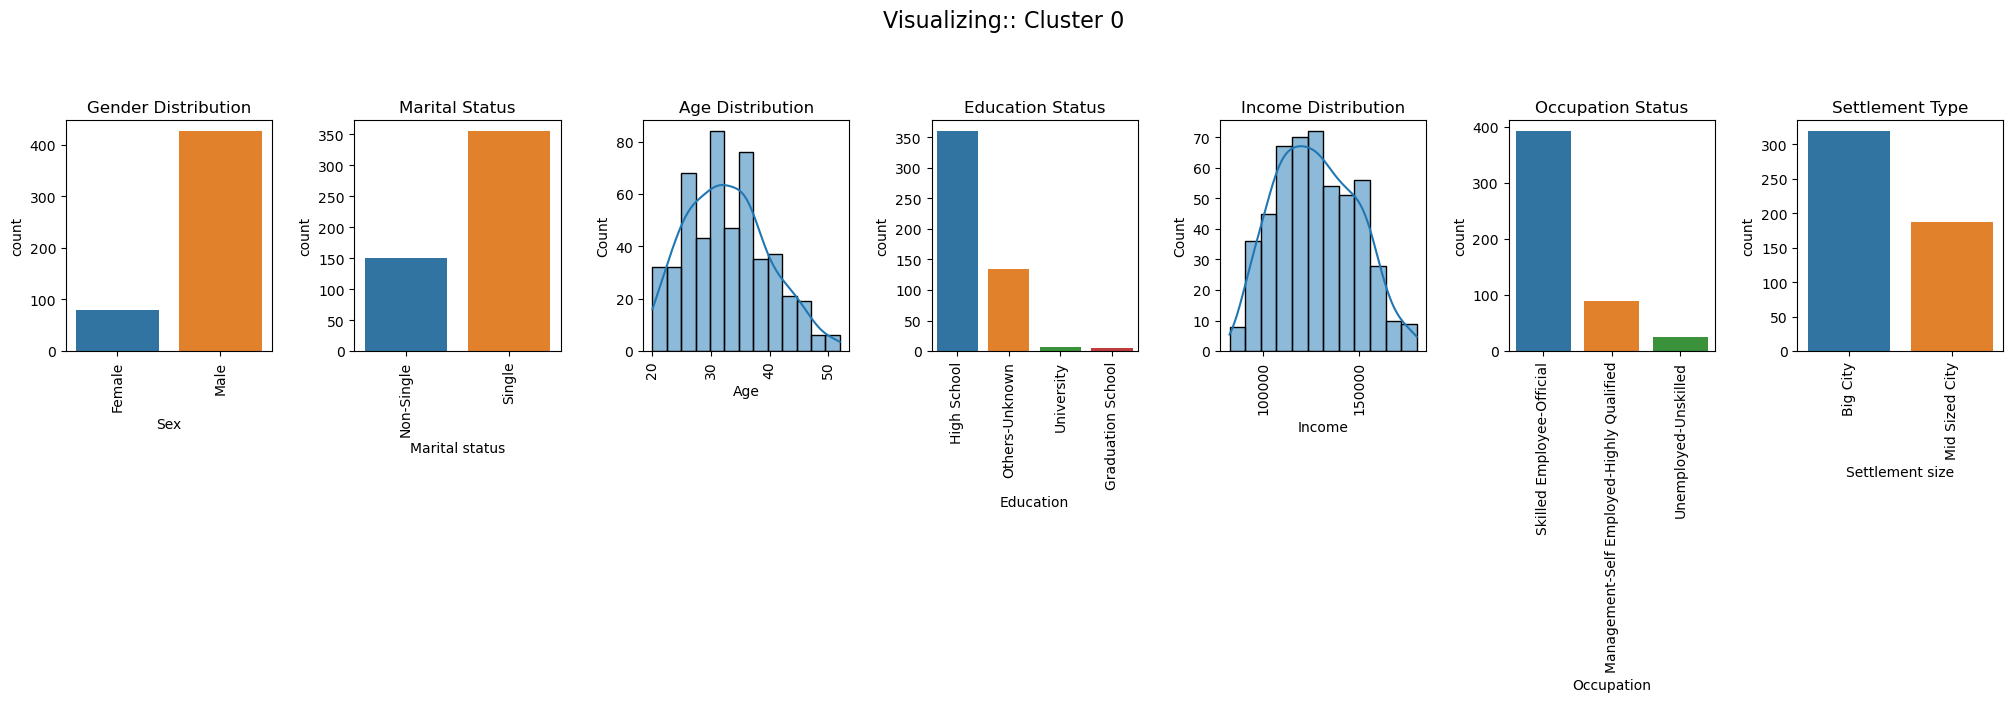

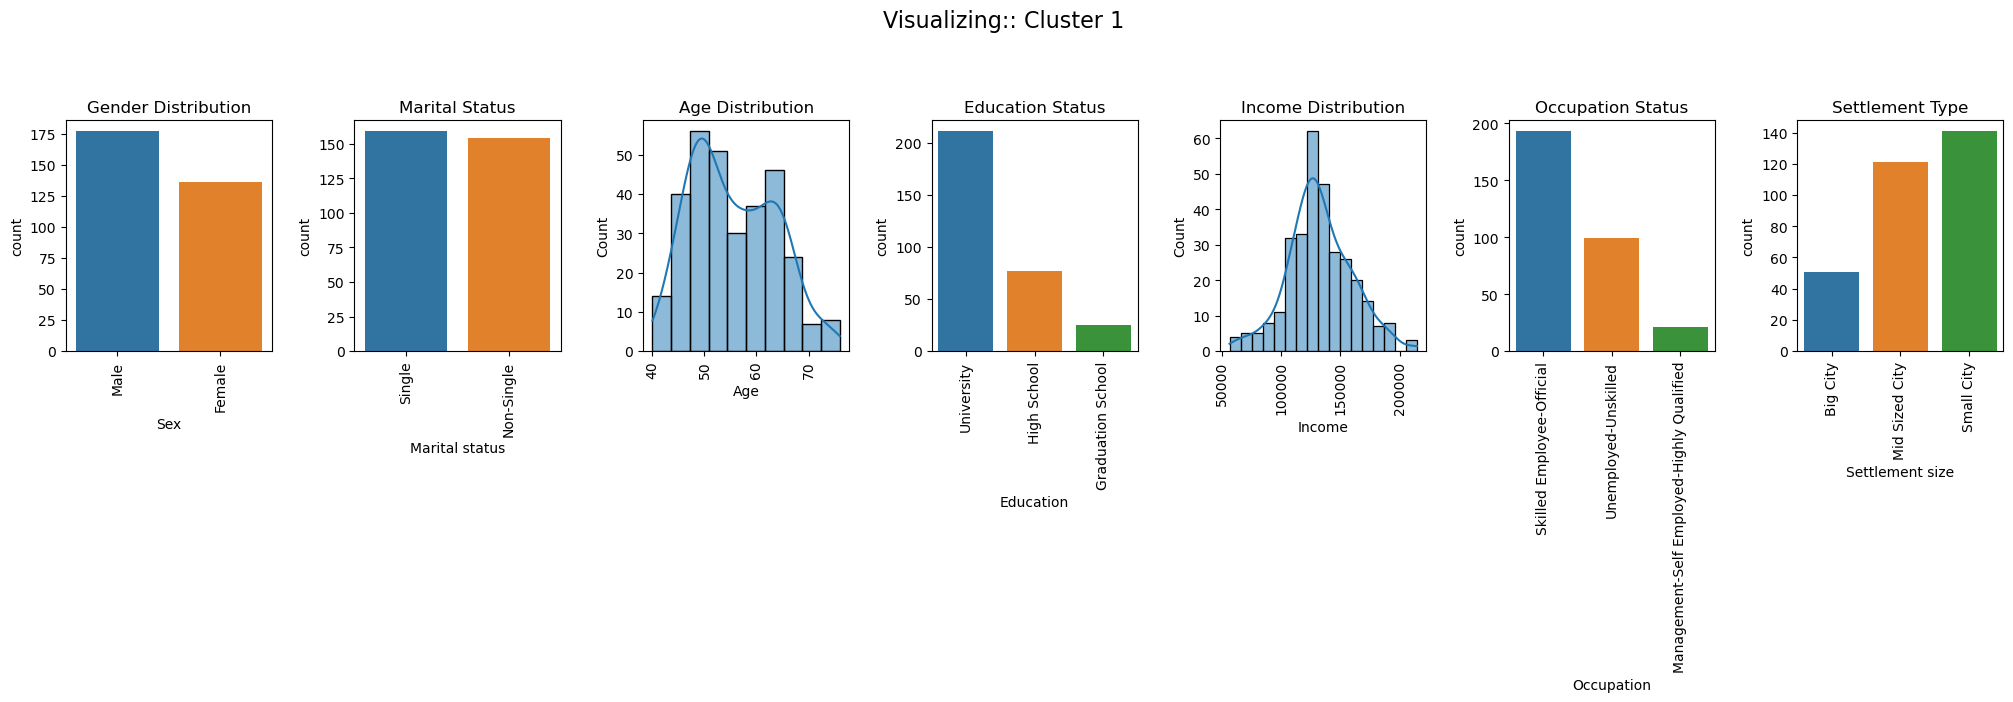

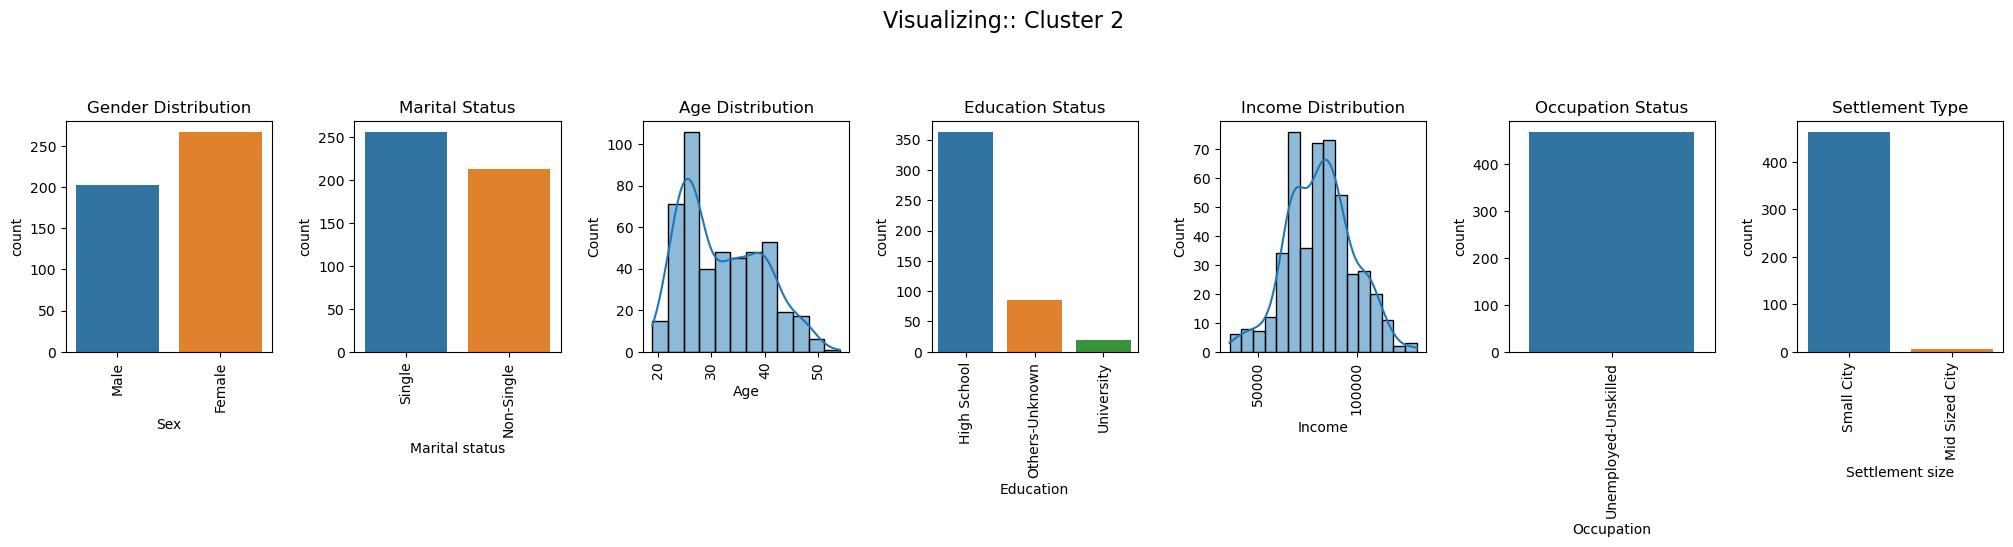

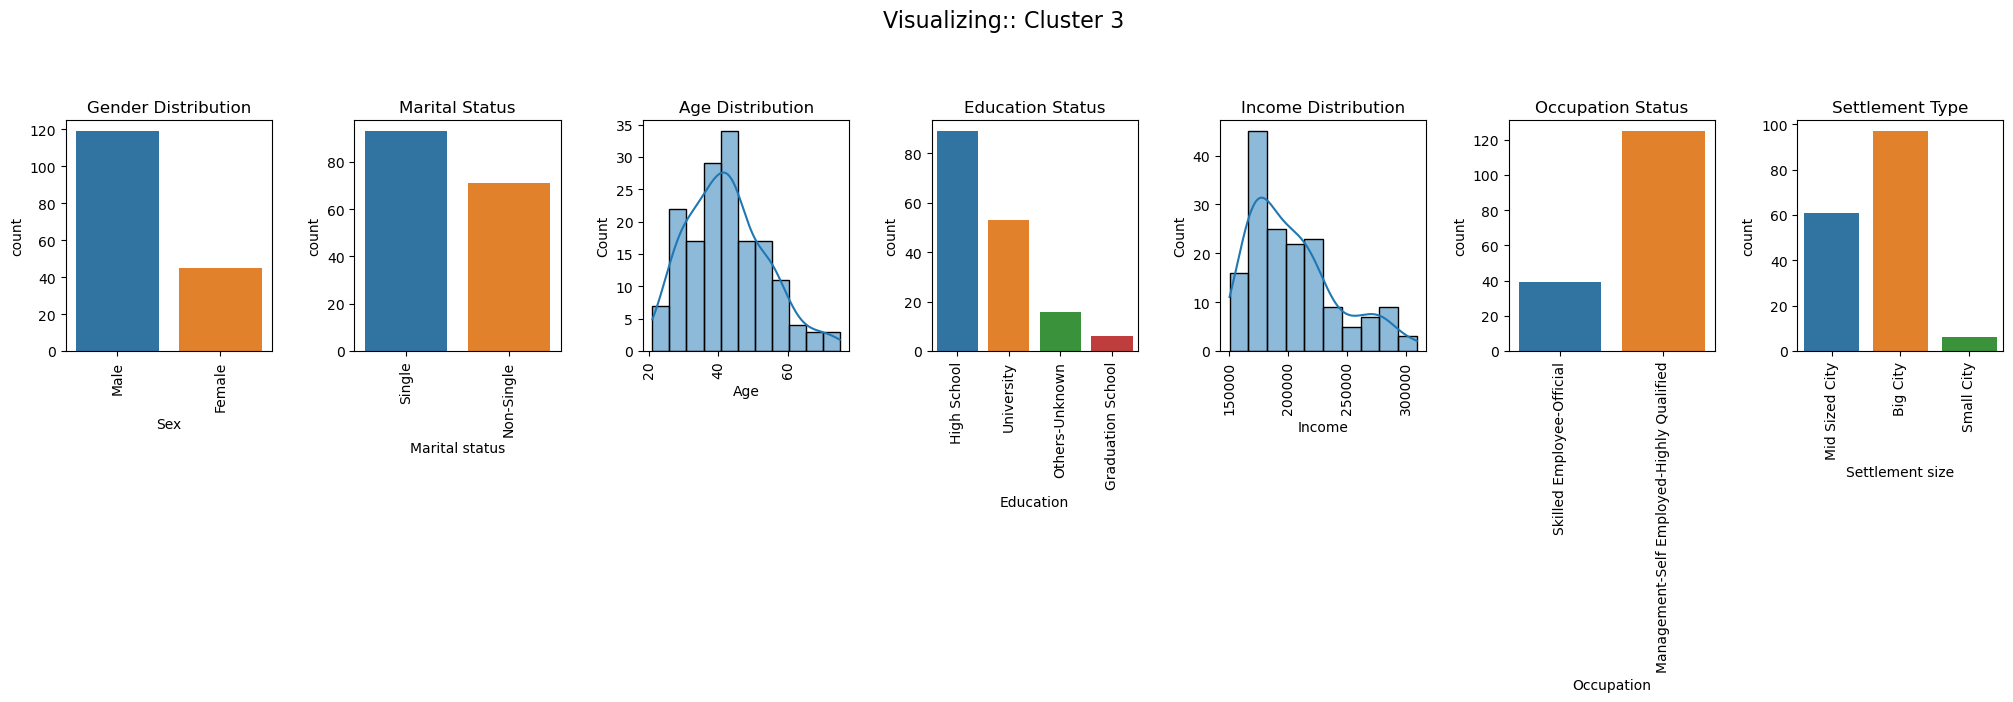

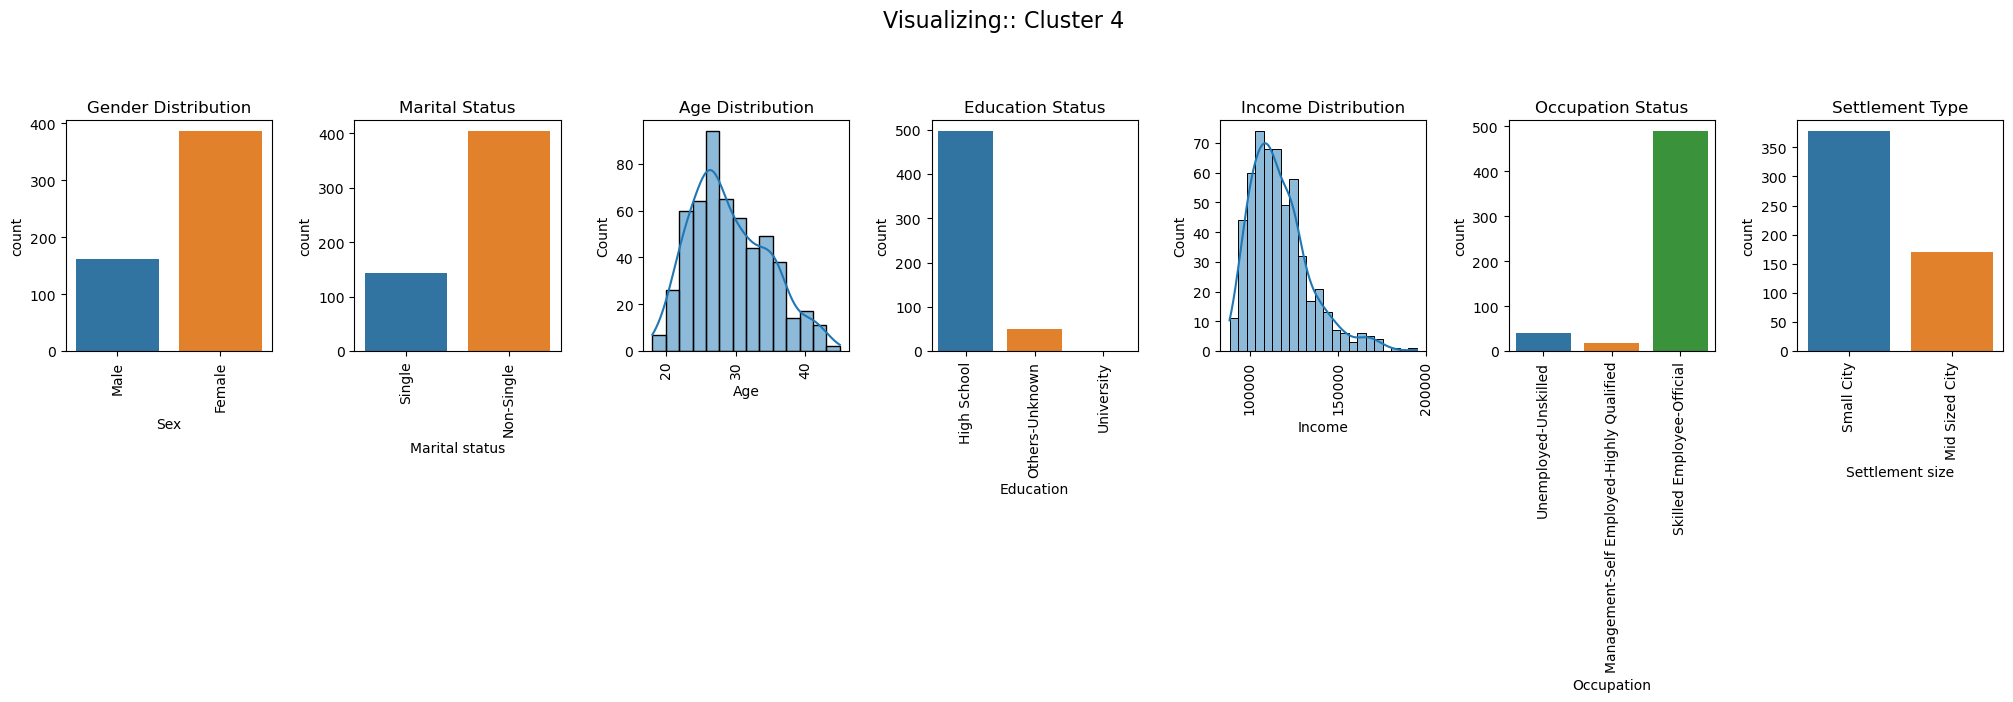

In [78]:
# Creating Graph for all dtypes
for i in sorted_keys:
    data = clustered_dataframes[i]
    
    fig, axis = plt.subplots(1, 7, figsize=(25, 3))
    
    # Plot 1: Categorical Plot for Sex
    sns.countplot(x='Sex', data=data, ax=axis[0])
    axis[0].set_title('Gender Distribution')
    axis[0].tick_params(axis='x', rotation=90)

    # Plot 2: Categorical Plot for marital Status
    sns.countplot(x='Marital status', data=data, ax=axis[1])
    axis[1].set_title('Marital Status')
    axis[1].tick_params(axis='x', rotation=90)

    # Plot 3: Distribution Plot Age
    sns.histplot(data['Age'], kde=True, ax=axis[2])
    axis[2].set_title('Age Distribution')
    axis[2].tick_params(axis='x', rotation=90)

    # Plot 4: Categorical Plot for Education
    sns.countplot(x='Education', data=data, ax=axis[3])
    axis[3].set_title('Education Status')
    axis[3].tick_params(axis='x', rotation=90)

    # Plot 5: Distribution Plot for Income
    sns.histplot(data['Income'], kde=True, ax=axis[4])
    axis[4].set_title('Income Distribution')
    axis[4].tick_params(axis='x', rotation=90)

    # Plot 6: Distribution Plot for Occupation
    sns.countplot(x='Occupation', data=data, ax=axis[5])
    axis[5].set_title('Occupation Status')
    axis[5].tick_params(axis='x', rotation=90)

    # Plot 7: Categorical Plot for Settlement
    sns.countplot(x='Settlement size', data=data, ax=axis[6])
    axis[6].set_title('Settlement Type')
    axis[6].tick_params(axis='x', rotation=90)
    
    # Add a title for the overall set of subplots
    graphname = i.replace("cluster_", "Cluster ")
    fig.suptitle(f'Visualizing:: {graphname}', fontsize=16, y=1.25)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    # Show the plot
    plt.show()

In [79]:
# Generating Summary of Clusters

In [80]:
clustered_dataframes['cluster_0'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 1594
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               506 non-null    int64 
 1   Sex              506 non-null    object
 2   Marital status   506 non-null    object
 3   Age              506 non-null    int64 
 4   Education        506 non-null    object
 5   Income           506 non-null    int64 
 6   Occupation       506 non-null    object
 7   Settlement size  506 non-null    object
 8   Cluster          506 non-null    int32 
dtypes: int32(1), int64(3), object(5)
memory usage: 37.6+ KB


In [81]:
for i in sorted_keys:
    data = clustered_dataframes[i]
    summaryname = i.replace("cluster_", "Cluster ")
    print(f'Summary of:: \033[1m{summaryname}\033[0m')
    
    #Gender Max
    GenderMax = data["Sex"].mode().values[0]
    print(f'Majority Gender is :: \033[1m{GenderMax}\033[0m')
    
    #Status of Marital 
    MaritalMax = data["Marital status"].mode().values[0]
    print(f'Marital Status is :: \033[1m{MaritalMax}\033[0m')
    
    #Average Age of Gender Max
    RowSelection = data[data['Sex'] == GenderMax]
    AverageAge = RowSelection['Age'].mean()
    minAge = RowSelection['Age'].min()
    maxAge = RowSelection['Age'].max()
    print(f'Average Age of {GenderMax} is :: \033[1m{int(round(AverageAge,0))}\033[0m')
    print(f'Minimum Age of {GenderMax} is :: \033[1m{round(minAge,0)}\033[0m')
    print(f'Maximum Age of {GenderMax} is :: \033[1m{round(maxAge,0)}\033[0m')
    
    #Education Level
    MaxEducation = data["Education"].mode().values[0]
    print(f'Maximum Education :: \033[1m{MaxEducation}\033[0m')
    
    #Income Level of Maximum Gender Group
    RowSelection = data[data['Sex'] == GenderMax]
    AverageIncome = RowSelection['Income'].mean()
    print(f'Average Income of {GenderMax} is :: \033[1m{round(AverageIncome,2)}\033[0m')
    
    #Status of Occupation
    OccupationMax = data["Occupation"].mode().values[0]
    print(f'Occupation Status is :: \033[1m{OccupationMax}\033[0m')
    
    #Status of Stay 
    SettlementMax = data["Settlement size"].mode().values[0]
    print(f'Settled at :: \033[1m{SettlementMax}\033[0m')
    print()

Summary of:: Cluster 0
Majority Gender is :: Male
Marital Status is :: Single
Average Age of Male is :: 34
Minimum Age of Male is :: 20
Maximum Age of Male is :: 52
Maximum Education :: High School
Average Income of Male is :: 128616.65
Occupation Status is :: Skilled Employee-Official
Settled at :: Big City

Summary of:: Cluster 1
Majority Gender is :: Male
Marital Status is :: Single
Average Age of Male is :: 56
Minimum Age of Male is :: 42
Maximum Age of Male is :: 74
Maximum Education :: University
Average Income of Male is :: 134566.2
Occupation Status is :: Skilled Employee-Official
Settled at :: Small City

Summary of:: Cluster 2
Majority Gender is :: Female
Marital Status is :: Single
Average Age of Female is :: 31
Minimum Age of Female is :: 19
Maximum Age of Female is :: 54
Maximum Education :: High School
Average Income of Female is :: 81353.93
Occupation Status is :: Unemployed-Unskilled
Settled at :: Small City

Summary of:: Cluster 3
Majority Gender is :: Male
Marital Sta

In [82]:
# End of Customer Segmentation

In [83]:
# Assignment Submitted by VINAY M on 07-09-2023